<a href="https://colab.research.google.com/github/kikiru328/enterprise_analysis/blob/main/Deeplearning_Keras_overunder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  # colab drive mount

import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)


Mounted at /content/drive


In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


17473536/17464789 [==============================] - 1s 0us/step


In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers

og_model = models.Sequential()
og_model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
og_model.add(layers.Dense(16, activation = 'relu'))
og_model.add(layers.Dense(1, activation = 'sigmoid'))

og_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

In [20]:
og_x_val = x_train[:10000]
og_p_x_train = x_train[10000:]
og_y_val = y_train[:10000]
og_p_y_train = y_train[10000:]

og_history = og_model.fit(og_p_x_train,
                       og_p_y_train,
                       epochs = 20,
                       batch_size=512,
                       validation_data = (og_x_val, og_y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5184 - acc: 0.7832 - val_loss: 0.3953 - val_acc: 0.8659
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3206 - acc: 0.8995 - val_loss: 0.3175 - val_acc: 0.8844
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2340 - acc: 0.9275 - val_loss: 0.3214 - val_acc: 0.8691
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1833 - acc: 0.9443 - val_loss: 0.2765 - val_acc: 0.8891
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1522 - acc: 0.9517 - val_loss: 0.2802 - val_acc: 0.8877
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1235 - acc: 0.9641 - val_loss: 0.3214 - val_acc: 0.8763
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1036 - acc: 0.9702 - val_loss: 0.3162 - val_acc: 0.8823
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0864 - a

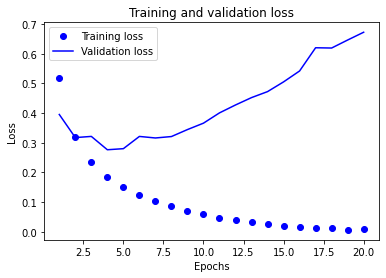

In [28]:
import matplotlib.pyplot as plt
og_loss = og_history.history['loss']
og_val_loss = og_history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [29]:
s_model = models.Sequential()
s_model.add(layers.Dense(6, activation = 'relu', input_shape = (10000,)))
s_model.add(layers.Dense(16, activation = 'relu'))
s_model.add(layers.Dense(1, activation = 'sigmoid'))

s_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

In [30]:
s_x_val = x_train[:10000]
s_p_x_train = x_train[10000:]
s_y_val = y_train[:10000]
s_p_y_train = y_train[10000:]

s_history = s_model.fit(s_p_x_train,
                       s_p_y_train,
                       epochs = 20,
                       batch_size=512,
                       validation_data = (s_x_val, s_y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5413 - acc: 0.7821 - val_loss: 0.4324 - val_acc: 0.8616
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3520 - acc: 0.8987 - val_loss: 0.3413 - val_acc: 0.8794
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2607 - acc: 0.9244 - val_loss: 0.3034 - val_acc: 0.8833
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2055 - acc: 0.9373 - val_loss: 0.2795 - val_acc: 0.8886
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1692 - acc: 0.9475 - val_loss: 0.3184 - val_acc: 0.8712
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1420 - acc: 0.9568 - val_loss: 0.2832 - val_acc: 0.8868
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1194 - acc: 0.9653 - val_loss: 0.2978 - val_acc: 0.8843
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1007 - a

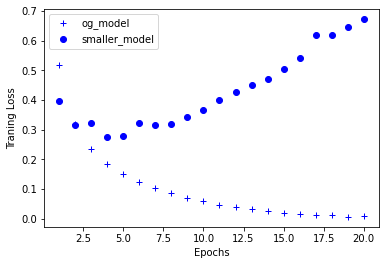

In [31]:
import matplotlib.pyplot as plt
s_loss = s_history.history['loss']
s_val_loss = s_history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, og_loss, 'b+', label='og_model')
plt.plot(epochs, val_loss,'bo', label='smaller_model')
plt.xlabel('Epochs')
plt.ylabel('Traning Loss')
plt.legend()

plt.show()

In [32]:
B_model = models.Sequential()
B_model.add(layers.Dense(1024, activation = 'relu', input_shape = (10000,)))
B_model.add(layers.Dense(1024, activation = 'relu'))
B_model.add(layers.Dense(1, activation = 'sigmoid'))
B_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

In [33]:
B_x_val = x_train[:10000]
B_p_x_train = x_train[10000:]
B_y_val = y_train[:10000]
B_p_y_train = y_train[10000:]

B_history = B_model.fit(B_p_x_train,
                       B_p_y_train,
                       epochs = 20,
                       batch_size=512,
                       validation_data = (B_x_val, B_y_val))

Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6604 - acc: 0.7341 - val_loss: 0.3112 - val_acc: 0.8762
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2655 - acc: 0.8953 - val_loss: 0.2659 - val_acc: 0.8894
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1551 - acc: 0.9438 - val_loss: 0.2680 - val_acc: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0922 - acc: 0.9747 - val_loss: 0.3056 - val_acc: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0064 - acc: 0.9990 - val_loss: 0.4594 - val_acc: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 3.9707e-04 - acc: 0.9999 - val_loss: 0.5881 - val_acc: 0.8898
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 3.8214e-05 - acc: 1.0000 - val_loss: 0.6871 - val_acc: 0.8893
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 7.

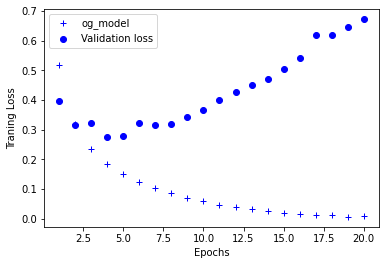

In [34]:
import matplotlib.pyplot as plt
B_loss = B_history.history['loss']
B_val_loss = B_history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, og_loss, 'b+', label='og_model')
plt.plot(epochs, val_loss,'bo', label='Validation loss')
plt.xlabel('Epochs')

plt.ylabel('Traning Loss')
plt.legend()

plt.show()

용량이 큰 네트웤크는 훈련 손실이 빠르게 0에 가까워진다., 용량이 많은 네트워크 일수록 더 빠르게 훈련 데이터를 모델링할 수 있어서 훈련 손실이 낮아진다. 하지만 더욱 과대적합에 민감해진다. (훈련과 검증 손실 사이에 큰 차이가 발생)

In [12]:
from keras import regularizers
rg2_model = models.Sequential()
rg2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                       activation='relu',
                       input_shape=(10000,)))
rg2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
rg2_model.add(layers.Dense(1,activation='sigmoid'))

In [13]:
rg2_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

In [14]:
rg2_model_hist = rg2_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 4s 44ms/step - loss: 0.4934 - acc: 0.8236 - val_loss: 0.3922 - val_acc: 0.8696
Epoch 2/20
49/49 [==============================] - 1s 15ms/step - loss: 0.3152 - acc: 0.9038 - val_loss: 0.3499 - val_acc: 0.8788
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2693 - acc: 0.9215 - val_loss: 0.3547 - val_acc: 0.8754
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2506 - acc: 0.9277 - val_loss: 0.3361 - val_acc: 0.8856
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2355 - acc: 0.9329 - val_loss: 0.3630 - val_acc: 0.8751
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2278 - acc: 0.9370 - val_loss: 0.3736 - val_acc: 0.8723
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2215 - acc: 0.9382 - val_loss: 0.3626 - val_acc: 0.8782
Epoch 8/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2175 - a

In [17]:
rg2_model_val_loss = rg2_model_hist.history['val_loss']

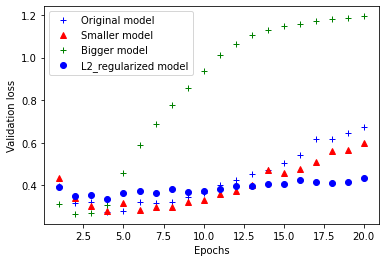

In [41]:
plt.plot(epochs, og_val_loss, 'b+', label='Original model')
plt.plot(epochs, s_val_loss, 'r^', label='Smaller model')
plt.plot(epochs, B_val_loss, 'g+', label='Bigger model')
plt.plot(epochs, rg2_model_val_loss, 'bo', label = 'L2_regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

두 모델이 동일한 파라미터 수를 가지고 있더라도 L2 규제를 사용한 모델이 기본 모델보다 훨씬 더 과대적합에 잘 견디고 있다.

In [50]:
# dropout
from tensorflow.keras import models
from tensorflow.keras import layers
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16,activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

In [51]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 35ms/step - loss: 0.6247 - acc: 0.6564 - val_loss: 0.5113 - val_acc: 0.8606
Epoch 2/20
49/49 [==============================] - 1s 15ms/step - loss: 0.5051 - acc: 0.7821 - val_loss: 0.3910 - val_acc: 0.8791
Epoch 3/20
49/49 [==============================] - 1s 15ms/step - loss: 0.4067 - acc: 0.8446 - val_loss: 0.3229 - val_acc: 0.8870
Epoch 4/20
49/49 [==============================] - 1s 15ms/step - loss: 0.3367 - acc: 0.8756 - val_loss: 0.2915 - val_acc: 0.8906
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2968 - acc: 0.8951 - val_loss: 0.2780 - val_acc: 0.8910
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2592 - acc: 0.9086 - val_loss: 0.2945 - val_acc: 0.8836
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2295 - acc: 0.9220 - val_loss: 0.2889 - val_acc: 0.8884
Epoch 8/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2052 - a

In [53]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

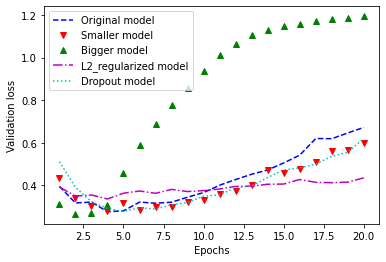

In [65]:
plt.plot(epochs, og_val_loss, 'b--', label='Original model')
plt.plot(epochs, s_val_loss, 'rv', label='Smaller model')
plt.plot(epochs, B_val_loss, 'g^', label='Bigger model')
plt.plot(epochs, rg2_model_val_loss, 'm-.', label = 'L2_regularized model')
plt.plot(epochs, dpt_model_val_loss, 'c:', label = 'Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

신경망에서 과대적합을 방지하기 위한 방법
- 훈련 데이터를 더 모은다.
- 네트워크의 용량을 감소 시킨다
- 가중치 규제를 추가한다
- 드롭아웃을 추가한다.